In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sympy import symbols, diff, exp
import pandas as pd

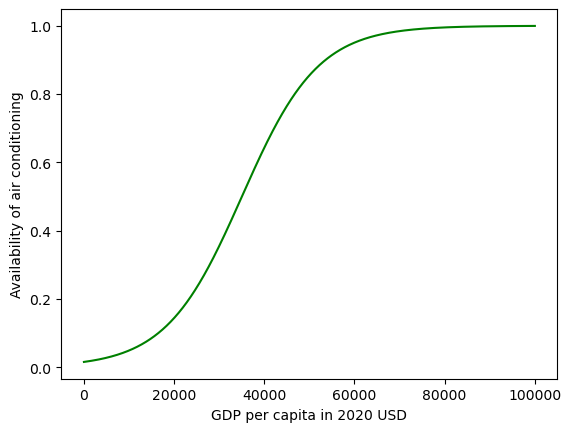

In [8]:
gdp = np.linspace(0, 100000, 1000)
# Factor 0.5 between 1995 USD and 2020 USD

def avail(gdp, infl_factor):
    return (1/(1+np.exp(4.152)*np.exp(-0.237*infl_factor*gdp/1000)))
    

plt.plot(gdp, avail(gdp, 0.5), color='green')
plt.xlabel('GDP per capita in 2020 USD')
plt.ylabel('Availability of air conditioning')
if not os.path.exists('Figures/exposure_funct_analysis'):
    os.makedirs('Figures/exposure_funct_analysis')
plt.savefig('Figures/exposure_funct_analysis/availability.png', dpi=300)

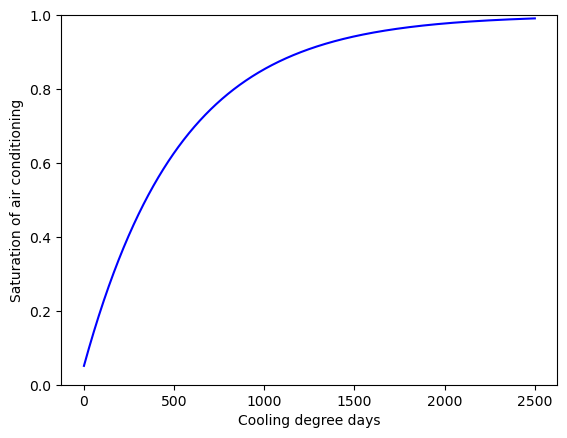

In [9]:
cdd_x = np.linspace(0, 2500, 1000)
def sat(cdd):
    return (1.00 - 0.949*np.exp(-0.00187*cdd))
plt.plot(cdd_x, sat(cdd_x), color='blue')
plt.xlabel('Cooling degree days')
plt.ylabel('Saturation of air conditioning')
plt.ylim(0, 1.)
plt.savefig('Figures/exposure_funct_analysis/saturation.png', dpi=300)

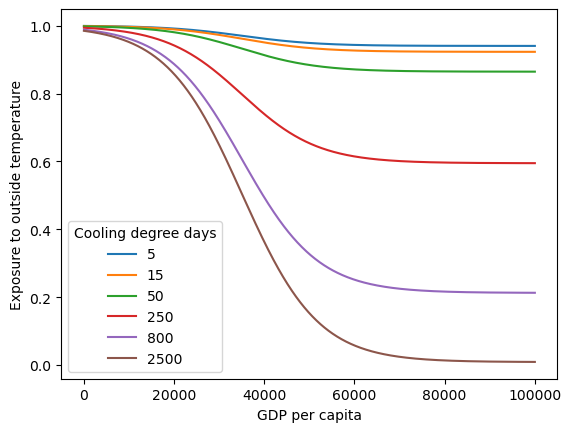

In [4]:
# Show penetration of air conditioning as a function of GDP per capita for different cooling degree days
plt.figure()
def exposure(gdp, infl_fact, cdd):
    return (1 - avail(gdp, infl_fact)*sat(cdd))
for cdd in [5, 15, 50, 250, 800, 2500]:
    plt.plot(gdp, exposure(gdp, 0.5, cdd), label=str(cdd))
plt.xlabel('GDP per capita')
plt.ylabel('Exposure to outside temperature')
plt.legend(title='Cooling degree days')
plt.savefig('Figures/exposure_funct_analysis/exposure_gdp.png', dpi=300)

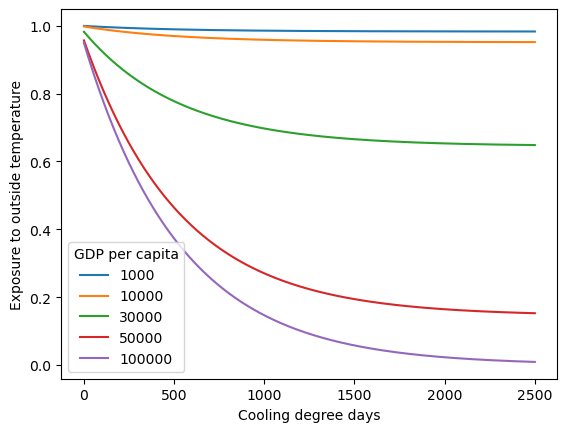

In [5]:
# Show exposure to outside temperature as a function of cooling degree days for different GDP per capita
plt.figure()
for gdp in [1000, 10000, 30000, 50000, 100000]:
    plt.plot(cdd_x, exposure(gdp, 0.5, cdd_x), label=str(gdp))
plt.xlabel('Cooling degree days')
plt.ylabel('Exposure to outside temperature')
plt.legend(title='GDP per capita')
plt.savefig('Figures/exposure_funct_analysis/exposure_cdd.png', dpi=300)

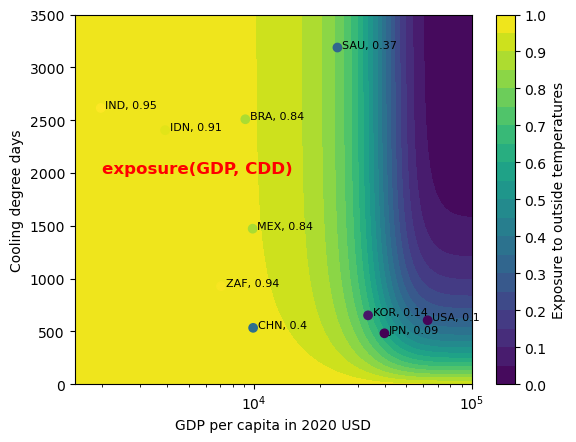

In [6]:
# Make a contour plot of penetration of air conditioning as a function of GDP per capita and cooling degree days
plt.figure()
cdd_x = np.linspace(0, 3500, 100)
gdp_x = np.linspace(0, 100000, 100)
levels = np.linspace(0, 1, 21)
cdd_x, gdp_x = np.meshgrid(cdd_x, gdp_x)
plt.contourf(gdp_x, cdd_x, exposure(gdp_x, 0.5, cdd_x), levels=levels)

plt.xlabel('GDP per capita in 2020 USD')
# GDP log scale
plt.xscale('log')
plt.xlim(1500, 100000)
plt.ylabel('Cooling degree days')
plt.colorbar(label='Exposure to outside temperatures', ticks=np.linspace(0, 1, 11))
# color bar range is 0 to 1
plt.clim(0, 1.0)
# Add label in red and bold
plt.text(2000, 2000, 'exposure(GDP, CDD)', fontsize=12, color='red', fontweight='bold')

# Overlay AC data
# Read in AC data
ac_data = pd.read_csv('data_experiencedT/AC_data.csv')
# Remove rows with missing data
ac_data = ac_data.dropna()
# Reindex
ac_data = ac_data.reset_index(drop=True)
# Plot AC access as a function of GDP per capita and cooling degree days
plt.scatter(ac_data['GDP'], ac_data['DD_mean'], c=1.-ac_data['AC'], cmap='viridis', label='AC access')
# Label points with country names
for i, txt in enumerate(ac_data['ISO3'].values):
    plt.annotate(txt+", "+str(round(1.-ac_data['AC'][i],3)), (ac_data['GDP'][i]*1.05, ac_data['DD_mean'][i]), fontsize=8)

plt.savefig('Figures/exposure_funct_analysis/exposure_contour.png', dpi=300)

In [7]:
# Plot contour of exposure times cooling degree days
plt.figure()
cdd_x = np.linspace(0, 2500, 100)
gdp_x = np.linspace(0, 100000, 100)
levels = np.linspace(0, 2500, 51)
cdd_x, gdp_x = np.meshgrid(cdd_x, gdp_x)
plt.contourf(gdp_x, cdd_x, exposure(gdp_x, cdd_x)*cdd_x, levels=levels)
plt.xlabel('GDP per capita in 2020 USD')
# GDP log scale
plt.xscale('log')
plt.xlim(2000, 100000)
plt.ylabel('Cooling degree days')
plt.colorbar(label='Exposure times cooling degree days', ticks=np.linspace(0, 2500, 11))
# color bar range is 0 to 1000
plt.clim(0, 2500)
# Add label in red and bold
plt.text(2500, 2000, 'exposure(GDP, CDD)*CDD', fontsize=12, color='red', fontweight='bold')
plt.savefig('Figures/exposure_funct_analysis/exposurexcdd_contour.png', dpi=300)

TypeError: exposure() missing 1 required positional argument: 'cdd'

<Figure size 640x480 with 0 Axes>

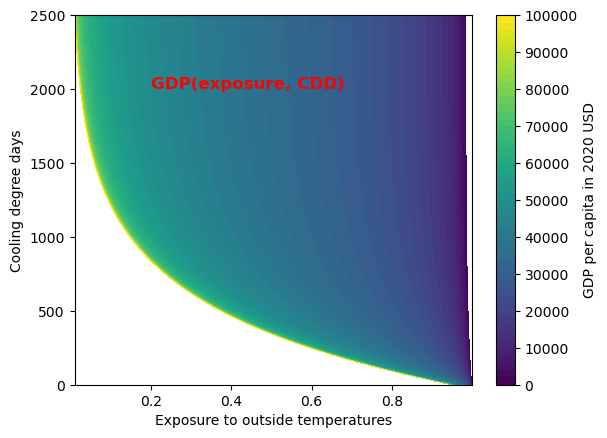

In [ ]:
# Make contour plot of GDP as a function of penetration of air conditioning and cooling degree days
plt.figure()
levels = np.linspace(0, 100000, 51)
plt.contourf(exposure(gdp_x,cdd_x), cdd_x, gdp_x, levels=levels)
plt.xlabel('Exposure to outside temperatures')
plt.ylabel('Cooling degree days')
plt.colorbar(label='GDP per capita in 2020 USD', ticks=np.linspace(0, 100000, 11))
# color bar range is 0 to 100000
plt.clim(0, 100000)
# Add label in red and bold
plt.text(0.2, 2000, 'GDP(exposure, CDD)', fontsize=12, color='red', fontweight='bold')
plt.savefig('Figures/exposure_funct_analysis/GDP_contour.png', dpi=300)

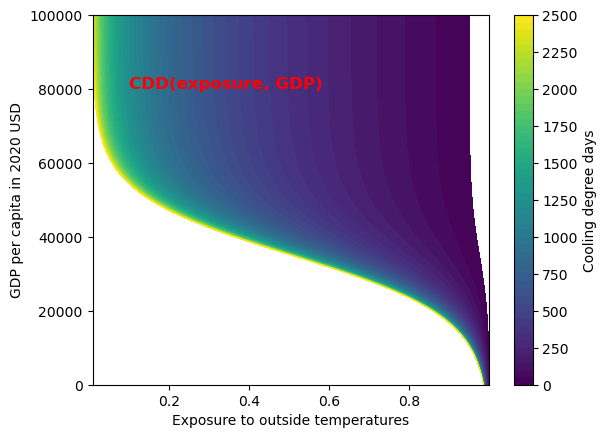

In [ ]:
# Make contour plot of cooling degree days as a function of exposure and GDP
plt.figure()
levels = np.linspace(0, 2500, 51)
plt.contourf(exposure(gdp_x,cdd_x), gdp_x, cdd_x, levels=levels)
plt.xlabel('Exposure to outside temperatures')
plt.ylabel('GDP per capita in 2020 USD')
plt.colorbar(label='Cooling degree days', ticks=np.linspace(0, 2500, 11))
# color bar range is 0 to 2500
plt.clim(0, 2500)
# Add label in red and bold
plt.text(0.1, 80000, 'CDD(exposure, GDP)', fontsize=12, color='red', fontweight='bold')
plt.savefig('Figures/exposure_funct_analysis/CDD_contour.png', dpi=300)

-1.86435092042552e-6*gdp_sym*(1.0 - 0.949*exp(-0.00187*cdd_sym))*exp(-0.0001185*gdp_sym)/(0.015732919159709 + exp(-0.0001185*gdp_sym))**2
0.00753197793728393*(0.00024752474528594/(0.015732919159709 + exp(-0.0001185*gdp_sym))**2)*exp(-0.0001185*gdp_sym)


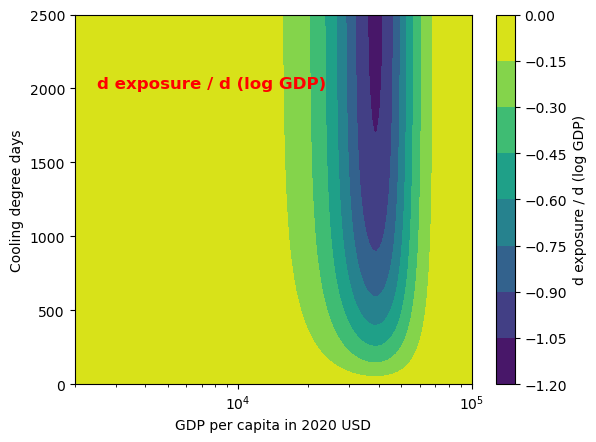

In [ ]:
gdp_sym, cdd_sym = symbols('gdp_sym cdd_sym')

# Define the symbolic functions for avail and sat
avail_sym = 1 / (1 + exp(4.152) * exp(-0.237 * infl_factor * gdp_sym / 1000))
sat_sym = 1.00 - 0.949 * exp(-0.00187 * cdd_sym)

# Define the symbolic function for exposure
exposure_sym = 1 - avail_sym * sat_sym
# Derivative of exposure with respect to log GDP
partial_gdp_sym = diff(exposure_sym, gdp_sym) * gdp_sym
print(partial_gdp_sym)
print(diff(avail_sym, gdp_sym))

# Compute derivative of exposure with respect to GDP
partial_gdp_func = np.vectorize(lambda g, c: partial_gdp_sym.evalf(subs={gdp_sym: g, cdd_sym: c}))

# Compute the values of the partial derivatives on the meshgrid
partial_gdp_values = partial_gdp_func(gdp_x, cdd_x)


# Make contour plot of d_exposure_d_gdp as a function of exposure and GDP
plt.figure()
plt.contourf(gdp_x, cdd_x, partial_gdp_values)
plt.xlabel('GDP per capita in 2020 USD')
# x axis log scale
plt.xscale('log')
# x range 1 to 100000
plt.xlim(2000, 100000)
plt.ylabel('Cooling degree days')
plt.colorbar(label='d exposure / d (log GDP)')
# Add label in red and bold
plt.text(2500, 2000, 'd exposure / d (log GDP)', fontsize=12, color='red', fontweight='bold')
plt.savefig('Figures/exposure_funct_analysis/d_exposure_d_gdp_contour.png', dpi=300)

-0.00177463*exp(-0.00187*cdd_sym)/(1 + 63.5609952513411*exp(-0.0001185*gdp_sym))


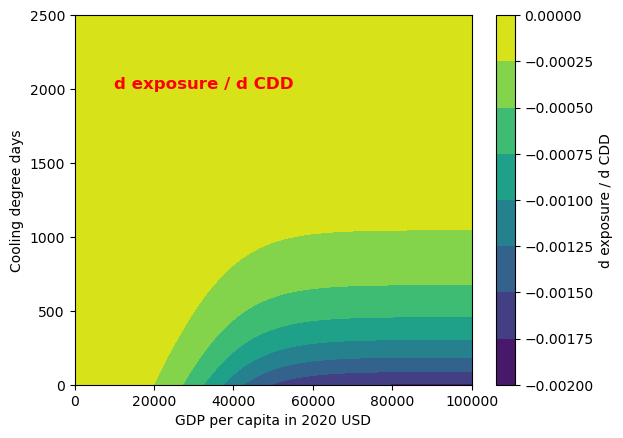

In [ ]:
# Compute derivative of exposure with respect to CDD
partial_cdd_sym = diff(exposure_sym, cdd_sym)
partial_cdd_func = np.vectorize(lambda g, c: partial_cdd_sym.evalf(subs={gdp_sym: g, cdd_sym: c}))
print(partial_cdd_sym)
partial_cdd_values = partial_cdd_func(gdp_x, cdd_x)

# Make contour plot of d_exposure_d_cdd as a function of exposure and GDP
plt.figure()
plt.contourf(gdp_x, cdd_x, partial_cdd_values)
plt.xlabel('GDP per capita in 2020 USD')
plt.ylabel('Cooling degree days')
plt.colorbar(label='d exposure / d CDD')

# Add label in red and bold
plt.text(10000, 2000, 'd exposure / d CDD', fontsize=12, color='red', fontweight='bold')
plt.savefig('Figures/exposure_funct_analysis/d_exposure_d_cdd_contour.png', dpi=300)